# What Aircraft Should We Purchase?

## Darryn J.

12/05/2023

Instructor : Morgan Jones

Blog : [Is Data Science Right For You?](https://datascienceandyou.blogspot.com/2023/12/is-data-science-right-for-you.html)

Student Pace : Flex

## Business Understanding

Using the National Transportaion Safety Boards's (NTSB) data sheet on aircraft incidents, we will look into what aircrafts meet our safety requirements. The Primary requirement we will be looking into is safety. What metrics can we use to determine a safe aircraft? 

Here, we load in some usefull libraries that will allow us to quickly gather information that would have otherwise taken a large amount of time to produce and evaluate.

In [1]:
# import needed libraries
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
%matplotlib inline

Load in dataset using pandas 

In [2]:
df1 = pd.read_csv('AviationData.csv', encoding = 'latin_1', low_memory=False)

In [3]:
# see what df contains
df1.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

# Data Distribution

Here we take a quick glance at how the data is distributed using fatalities per year.

Here we convert the `Event.Date` column to a DateTime object so its easier to work with as a date. 

In [5]:
df1['Event.Date'] = pd.to_datetime(df1['Event.Date'])

Adding a `year` column makes it a lot easier to gather information by the year.

In [6]:
df1['year'] = df1['Event.Date'].dt.year

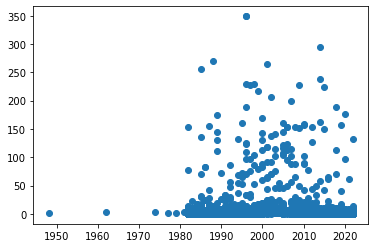

In [7]:
x = df1['year']
y = df1['Total.Fatal.Injuries']
plt.scatter(x, y)
plt.show()

In [8]:
# create def to automate finding how many incidents have a specified fatality count

def percent_of_fatalities(number):
    fatal_list = len(df1[df1['Total.Fatal.Injuries'] == number]) # use only entries with specified fatalities
    list_total = len(df1) # count total entries
    percent = (fatal_list / list_total) * 100 # devide to find percent
    rounded = round(percent, 2) # round
    return '{} % of incidents are responable for {} death(s)'.format(rounded, number) # output

In [9]:
percent_of_fatalities(0)

'67.13 % of incidents are responable for 0 death(s)'

In [10]:
percent_of_fatalities(1)

'9.99 % of incidents are responable for 1 death(s)'

In [11]:
percent_of_fatalities(2)

'5.82 % of incidents are responable for 2 death(s)'

In [12]:
percent_of_fatalities(3)

'1.79 % of incidents are responable for 3 death(s)'

Nearly 80 % of incidents dont have an associated fatality. 1 fatality has the most associated entries, being almost 10 %.

## Metrics

The primary metrics used to narrow down to 3 specific recommendations are as follows -

- Engine count
    - does adding engines increase safety?
- Engine type
    - does engine type effect safety?
- Purpose of Flight
    - what purpose of flight is recommended?

## Overview

To start off this project i first load in some usefull tools such as `matplotlib` to allow us to create graphs, or `pandas` to help with data cleaning. After this i load in the data set and assign it to `df1`. Here is a quick overview of what takes place in this notebook -

- DATA CLEANING

    - Standardize the names of some brands to make it easier to work with
    - Dealing with `null` values
        - remove columns that contains overwhelming missing data
        - fill in `null` values with `0` when applicable

- DATA MANIPULATION
    - Define    
        - create several `function`'s to automate data gathering
    - Graphs Comparing Brands    
        - display graphs to visualize differences between brands
    - Engine Type
        - how does engine type effect safety
    - Purpose of Flight
        - does purpose of flight effect safety
    - Adding to the Data Frame
        - create new columns to hold new information
        - create new dataframes that contain narrowed down entries
        - merge created dataframes to create a new dataframe 
    - Engine Count
        - does the amount of engines on an aircraft effect safety
    - Narrowing Down
        - remove entries that are not airplanes and remove amateur built aircraft
        - look into entries that the aircraft has more than one engine
- DICTIONARY
    - information on each recommendation is stored in a dictionary for easy access
- METRICS RESULTS
    - Engine type
    - Purpose of Flight
    - Engine Count
- CONCLUSION
    - results from data gathering and minipulation    

# Data Cleaning

## Standardization

A data set that contains many different names for the same variable, i.e. 'Boeing' and 'BOEING', can be very difficult to work with. This next code block standardizes a few of the brand names to make for easier data gathering.

In [13]:
# standardize names 
df1['Make'] = df1['Make'].replace({'BOEING' : 'Boeing'})
df1['Make'] = df1['Make'].replace({'BOEING COMPANY' : 'Boeing'})
df1['Make'] = df1['Make'].replace({'Airbus Industrie' : 'AIRBUS'})
df1['Make'] = df1['Make'].replace({'AIRBUS INDUSTRIE' : 'AIRBUS'})
df1['Make'] = df1['Make'].replace({'AIRBUS' : 'Airbus'})
df1['Make'] = df1['Make'].replace({'CESSNA AIRCRAFT COMPANY' : 'CESSNA'})
df1['Make'] = df1['Make'].replace({'CESSNA' : 'Cessna'})
df1['Make'] = df1['Make'].replace({'EMBRAER' : 'Embraer'})
df1['Make'] = df1['Make'].replace({'PIPER' : 'Piper'})
df1['Make'] = df1['Make'].replace({'BOMBARDIER INC' : 'BOMBARDIER'})
df1['Make'] = df1['Make'].replace({'BOMBARDIER' : 'Bombardier'})

## Dealing With Null Values

Here we start looking into what columns contain `null` values. These are important to deal with early on as these can trip up code. Some `null` values are best to be removed, as seen here with the `schedule` column, due to overwhelming missing data. Others, as shown later in the notebook, can simply be replaced with a `0`, as removing the column may be harmful to the overall data collection.  

In [14]:
# check exact values for null
df1.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
year    

In [15]:
df1['Schedule']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
88884    NaN
88885    NaN
88886    NaN
88887    NaN
88888    NaN
Name: Schedule, Length: 88889, dtype: object

In [16]:
df1 = df1.drop(['Schedule'], axis = 1)

As mentioned above, sometimes its better to replace a `null` value with a `0`. This was done to allow a code block to add together all injuries and fatalities on a given incident and create a new column with the output. If the value was left as `null`, an error would arise.

In [17]:
df1['Total.Fatal.Injuries'].fillna(0.0, inplace = True)
df1['Total.Serious.Injuries'].fillna(0.0, inplace = True)
df1['Total.Minor.Injuries'].fillna(0.0, inplace = True)
df1.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,year
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,1948
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,1962
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,NaN,3.0,0.0,0.0,NaN,IMC,Cruise,Probable Cause,26-02-2007,1974
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,1977
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,NaN,1.0,2.0,0.0,0.0,VMC,Approach,Probable Cause,16-04-1980,1979


# Data Manipulation

## Define

Here we use a `def` or define, to create several code blocks that automatically exicute several lines of code when given specific information. These are called `functions`. This is done to gather information for several variables without re-writting the code each time. These `functions` gather this information -

- `engine_percent`
    - does engine type effect incident rate, and if so, what percent caused a fatality?
- `engine_type_percent`
    - how many entries is a specified engine type associated with?
- `engine_count`
    - how many incidents involve a (1, 2, 3, etc..) engine aircraft?
- `Find_percent`
    - what percent of fatalities does a specified make account for? 
- `find_death_per_crash`
    - how many incidents involving this make result in a falality?
- `incident_count`
    - what percent of incidents does a specific make account for? 
- `purpose_percent`
    - what percent of entries is associated with a specified purpose of flight?
- `p_flight_fatal_count`
    - how many deaths is a specified purpose of flight associated with?
- `percent_of_fatalites`
    - what percent of incidnets has a specified amount of fatalities?
- `engine_fatality`
    - what percent of each engine type is responsable for 1 or more fatality?
- `engine_fatal_percent`
    - what percent of fatalities is each engine count responsable for?
- `get_p_percent`
    - what percent of fatalities is each purpose of flight associated with?

In [18]:
# create function to gather fatalities based on engine type

def engine_percent(engine_type):
    engine_list = df1[df1['Engine.Type'] == engine_type] # only use entries with engine type
    fatal_count = len(engine_list[engine_list['Total.Fatal.Injuries'] >= 1]) # count entries with more than one fatality
    total_count = len(engine_list) # count entries in list
    percent = (fatal_count / total_count) * 100 # devide to find percent
    rounded = round(percent, 2) # round number
    return 'out of {} incidents involving {} engines, {} % had at least 1 fatality'.format(total_count, engine_type, rounded) # output

In [19]:
# create function to automate finding how many entries each engine type is associated with

def engine_type_percent(engine_type):
    engine_list = len(df1[df1['Engine.Type'] == engine_type]) # only count entries associated with specified engine type
    total_count = len(df1) # couunt total entries
    percent = (engine_list / total_count) * 100 # devide to find percent
    rounded = round(percent, 2) # round
    return 'out of {} entries, {} is responable for {} ({} %) of entries'.format(total_count, engine_type, engine_list, rounded) # output

In [20]:
# create function to gather percentage of each engine count

def engine_count(count):
    count_list = len(df1[df1['Number.of.Engines'] == count]) # only use specific engine count
    engine_total = len(df1['Number.of.Engines']) # total count 
    percent = (count_list / engine_total) * 100 # devide to find percent
    rounded = round(percent, 2) # round number
    return '{} engine airplanes are {} % of incidents'.format(count,rounded) # output

In [21]:
# create function to automate gathering the percentage of deaths per make vs total deaths of all crashes

def find_percent(make):
    make_list = df1[df1['Make'] == make] # only use specific make
    make_total = make_list['Total.Fatal.Injuries'].sum() # sum injuries for make
    total_fatal = df1['Total.Fatal.Injuries'].sum() # sum injuries for all entries
    percent = (make_total / total_fatal) * 100 # devide to find percent
    rounded = round(percent, 2) # round number
    return '{} % of total deaths'.format(rounded) # output    

In [22]:
# create function to automate gathering deaths vs total crashes per make

def find_death_per_crash(make):
    make_list = df1[df1['Make'] == make] # only use specific make
    make_total = len(make_list.loc[make_list['Total.Fatal.Injuries'] >= 1]) # count entries of specific make
    total_fatal = len(df1.loc[df1['Total.Fatal.Injuries'] >= 1]) # count total enties greater then one
    percent = (make_total / total_fatal) * 100 # devide to find percent
    rounded = round(percent, 2) # round number
    return '{} % of incidents result in at least 1 death'.format(rounded) # output

In [23]:
# create function to count specific make incidnet count vs total incident count

def incident_count(make):
    make_list = df1[df1['Make'] == make] # only use specific make
    make_total = len(make_list) # count incident entries
    df_total = len(df1) # total entries for entire df
    percent = (make_total / df_total) * 100 # devide to find percent
    rounded = round(percent, 2) # round number
    return 'out of {} entries, {} is {} % ({}) of entries'.format(df_total, make, rounded, make_total) # output
    

In [24]:
# create function to automate finding the percent of entries for each purpose of flight

def purpose_percent(purpose):
    p_list = len(df1[df1['Purpose.of.flight'] == purpose]) # count amount of specified purpose
    p_total = len(df1) # total entries in dataframe
    percent = (p_list / p_total) * 100 # devide to find percent
    rounded = round(percent, 2) # round number
    return '{} flights are {} % of reported incidents'.format(purpose, rounded) # output

In [25]:
# create function to automate finding how many deaths a specific purpose of flight is responsable for

def p_flight_fatal_count(purpose):
    purpose_list = df1[df1['Purpose.of.flight'] == purpose] # use only entries with specifies purpose
    fatal_total = purpose_list['Total.Fatal.Injuries'].sum() # sum fatalities 
    return '{} flights are responsable for {} death(s)'.format(purpose, fatal_total) # output

In [26]:
# create function to automate finding how many incidents have a specified fatality count

def percent_of_fatalities(number):
    fatal_list = len(df1[df1['Total.Fatal.Injuries'] == number]) # use only entries with specified fatalities
    list_total = len(df1) # count total entries
    percent = (fatal_list / list_total) * 100 # devide to find percent
    rounded = round(percent, 2) # round
    return '{} % of incidents are responable for {} death(s)'.format(rounded, number) # output

In [27]:
# create function to find what percent of each engine count is responable for 1 or more fatality 

def engine_fatality(count):
    engine_list = df1[df1['Number.of.Engines'] == count] # create df with only specified engine count
    engine_total = len(df1[df1['Number.of.Engines'] == count]) # count entries in engine_list
    fatality_list = engine_list[engine_list['Total.Fatal.Injuries'] >= 1] # create df with specified engine count and only contains 1 or more fatality 
    fatality_total = len(fatality_list) # count entries in fatality_list
    percent = (fatality_total / engine_total) * 100 # devide to get percent
    rounded = round(percent, 2) # round
    return "{} % of {} engine aircraft result in a fatality".format(rounded, count) # output

In [28]:
# create function to automate finding percent of fatalities for each engine count

def engine_fatal_percent(count):
    engine_list = df1[df1['Number.of.Engines'] == count] # create df using only specified engine count
    total_count = df1['Total.Fatal.Injuries'].sum() # add up all fatalities 
    fatality_list = engine_list[engine_list['Total.Fatal.Injuries'] >= 1] # create df with 1 or more fatalities 
    fatality_count = len(fatality_list) # count entries
    percent = (fatality_count / total_count) * 100 # devide to find percent
    rounded = round(percent, 2) # round
    return '{} engine aircraft are responsable for {} % of fatalities'.format(count, rounded) # output

In [29]:
# create function to automate finding what percent of fatalities a specifc purpose is related to

def get_p_percent(purpose):
    purpose_list = df1[df1['Purpose.of.flight'] == purpose] # create list with only specified purpose
    fatal_list = purpose_list[purpose_list['Total.Fatal.Injuries'] >= 1] # create list with only 1 or more fatality from above list
    fatal_count = len(fatal_list) # count entries in list
    total_list = df1[df1['Total.Fatal.Injuries'] >= 1] # create list from all entries with 1 or more fatalities 
    total = len(total_list) # count entries
    percent = (fatal_count / total) * 100 # devide
    rounded = round(percent, 2) # round
    return '{} flights are responsable for {} % of fatalities'.format(purpose, rounded) # output

Percent of total fatalities, how many crashes resulted in death, percent of entries and how engines effect incident rate (output showed later in dictionary) 

In [30]:
boeing_percent_of_deaths = find_percent('Boeing')
boeing_fatality_rate = find_death_per_crash('Boeing')
boeing_total_rate = incident_count('Boeing')

In [31]:
airbus_percent_of_deaths = find_percent('Airbus')
airbus_fatality_rate = find_death_per_crash('Airbus')
airbus_total_rate = incident_count('Airbus')

In [32]:
cessna_percent_of_deaths = find_percent('Cessna')
cessna_fatality_rate = find_death_per_crash('Cessna')
cessna_total_rate = incident_count('Cessna')

In [33]:
t_fan = engine_percent('Turbo Fan')

In [34]:
t_jet = engine_percent('Turbo Jet')

In [35]:
t_shaft = engine_percent('Turbo Shaft')

In [36]:
recip = engine_percent('Reciprocating')

## Graphs Comparing Brands

Here are some graphs that utilize the `functions` created earlier. Now we can visually see the differences between brands.

function utilized :

`find_percent`

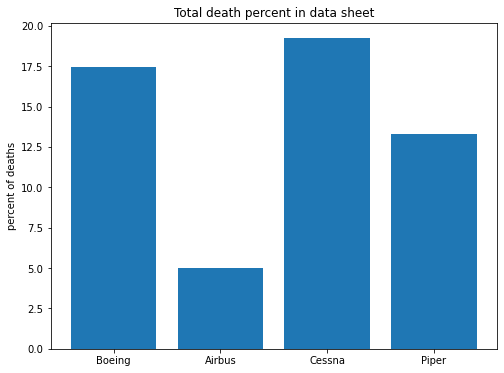

In [37]:
# Bargraph to compare death percent from each make

height = [17.43, 4.98, 19.23, 13.32]
x = range(4)
labels = ['Boeing', 'Airbus', 'Cessna', 'Piper']

fig, ax = plt.subplots(figsize = (8,6))
ax.bar(x, height, tick_label = labels)

ax.set_title('Total death percent in data sheet')
ax.set_ylabel('percent of deaths');

The barchart above shows the relationship between 4 brands of aircraft, specifically the percent of deaths each brand is responsable for. Airbus clearly is responsable for significantly less deaths. 

function utilized:

`find_death_per_crash`

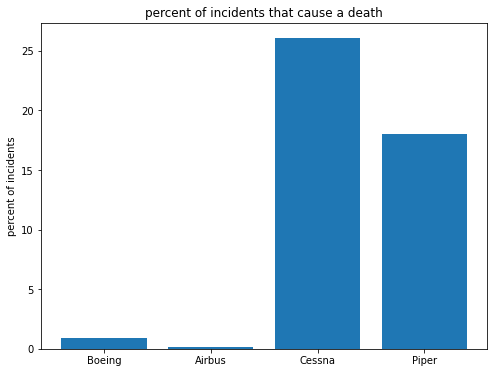

In [38]:
# Bargraph to show how many incidents cause at least one death

height = [0.94, 0.15, 26.06, 17.99]
x = range(4)
labels = ['Boeing', 'Airbus', 'Cessna', 'Piper']

fig, ax = plt.subplots(figsize = (8,6))
ax.bar(x, height, tick_label = labels)

ax.set_title('percent of incidents that cause a death')
ax.set_ylabel('percent of incidents');

Here we can begin to notice a pattern, with Airbus seeming to be the best choice. Lets look at another graph to see if it continues.

function utilized:

`incident_count`

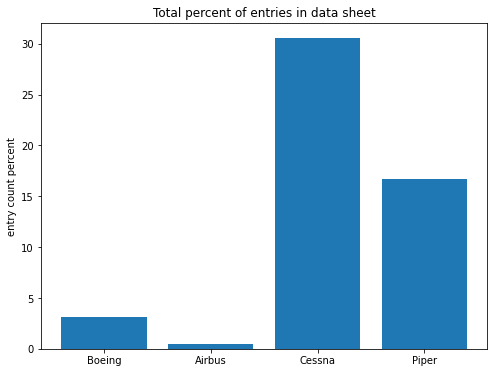

In [39]:
# Bargraph to show percent of entries each brand is responable for 
height = [3.1, 0.51, 30.55, 16.73]
x = range(4)
labels = ['Boeing', 'Airbus', 'Cessna', 'Piper']

fig, ax = plt.subplots(figsize = (8,6))
ax.bar(x, height, tick_label = labels)

ax.set_title('Total percent of entries in data sheet')
ax.set_ylabel('entry count percent');

Once again, Airbus is the best make with the lowest incidents reported, followed by Boeing, Piper and finally Cessna.


## Engine type

For engine type, we will compare 4 common engine types. 

- turbo fan
- turbo jet
- turbo shaft
- reciprocating

In [40]:
df1['Engine.Type'].value_counts()

Engine.Type
Reciprocating      69530
Turbo Shaft         3609
Turbo Prop          3391
Turbo Fan           2481
Unknown             2051
Turbo Jet            703
Geared Turbofan       12
Electric              10
LR                     2
NONE                   2
Hybrid Rocket          1
UNK                    1
Name: count, dtype: int64

Using a `function` written in the define section, we see that turbo jet engines have the least reported incidents, but the second highest fatalities per incident, whereas turbo fan engies have the third highest reported incidents, but the lowest fatalities per incident. 

function utilized:

`engine_percent`

In [41]:
print(t_fan)
print()
print(t_jet)
print()
print(t_shaft)
print()
print(recip)

out of 2481 incidents involving Turbo Fan engines, 7.98 % had at least 1 fatality

out of 703 incidents involving Turbo Jet engines, 19.35 % had at least 1 fatality

out of 3609 incidents involving Turbo Shaft engines, 22.14 % had at least 1 fatality

out of 69530 incidents involving Reciprocating engines, 18.91 % had at least 1 fatality


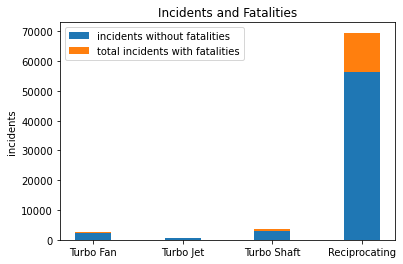

In [42]:
# create a stacked barchart to show incidents without fatalities and total incidents with fatalities
labels = ['Turbo Fan', 'Turbo Jet', 'Turbo Shaft', 'Reciprocating']
incidents = [2284, 567, 2810, 56382] # totals are [2481, 703, 3609, 69530]
fatalities = [197, 136, 799, 13148]
width = 0.4
fig, ax = plt.subplots()
ax.bar(labels, incidents, width, label = 'Engine Type')
ax.bar(labels, fatalities, width, bottom = incidents, label = 'fatalities')
ax.set_ylabel('incidents')
ax.set_title('Incidents and Fatalities')
plt.legend(['incidents without fatalities', 'total incidents with fatalities'])
plt.show()

Note:

The blue represents incidents that dont involve a fatality and the orange is the fatalities on top of the total no fatal incidents. Blue plus orange it the total amount of incidents.

Here we see its pretty clear that reciprocating has more significantly incidnets and more fatalities than turbo fan, turbo shaft and turbo jet. Using the `function` written in the define section, how many entries is each engine type associated with?

function utilized:

`engine_type_percent`

In [43]:
engine_type_percent('Turbo Fan')

'out of 88889 entries, Turbo Fan is responable for 2481 (2.79 %) of entries'

In [44]:
engine_type_percent('Turbo Jet')

'out of 88889 entries, Turbo Jet is responable for 703 (0.79 %) of entries'

In [45]:
engine_type_percent('Turbo Shaft')

'out of 88889 entries, Turbo Shaft is responable for 3609 (4.06 %) of entries'

In [46]:
engine_type_percent('Reciprocating')

'out of 88889 entries, Reciprocating is responable for 69530 (78.22 %) of entries'

## Purpose of Flight

Here we look into the purpose of flight metric. The purpose of flight can effect many variables, including but not limited to:

- amateur crew vs professional crew
- type of aircraft being utilized 
- weather conditions that are safe to fly in
    - "VMC" or Visual Meteorological Conditions
    - "IMC" or Instrument Meteorological Conditions

The weather conditions mentioned above reference how the aircraft is piloted. With "VMC" conditions, pilots are capable of visually guiding the aircraft, while "IMC" requires pilots to utilize instraments to safely guide the aircraft. This is important to note because a profesional crew may be more capable of utilizing instraments and have the ability to still be in operation when in less then ideal weather, whereas a pilot using an aircraft for personal means may be less able to operate in aggressive weather because the aircraft may be smaller or the crew less experienced. The following code blocks deminstrates why i recommend using flights for only business or executive / corporate reasons, instead of personal.

In [47]:
df1['Purpose.of.flight'].value_counts()

Purpose.of.flight
Personal                     49448
Instructional                10601
Unknown                       6802
Aerial Application            4712
Business                      4018
Positioning                   1646
Other Work Use                1264
Ferry                          812
Aerial Observation             794
Public Aircraft                720
Executive/corporate            553
Flight Test                    405
Skydiving                      182
External Load                  123
Public Aircraft - Federal      105
Banner Tow                     101
Air Race show                   99
Public Aircraft - Local         74
Public Aircraft - State         64
Air Race/show                   59
Glider Tow                      53
Firefighting                    40
Air Drop                        11
ASHO                             6
PUBS                             4
PUBL                             1
Name: count, dtype: int64

Here we utilize the `function` written in the define section to quickly gather what percent of incidents a given purpose of flight is responsable for.

function utilized:

`purpose_percent`

In [48]:
purpose_percent('Business')

'Business flights are 4.52 % of reported incidents'

In [49]:
purpose_percent('Executive/corporate')

'Executive/corporate flights are 0.62 % of reported incidents'

In [50]:
purpose_percent('Personal')

'Personal flights are 55.63 % of reported incidents'

We can see that the `Business` and `Executive/corporate` entries have significantly less reported incidents involving them. Lets check out some graphs.

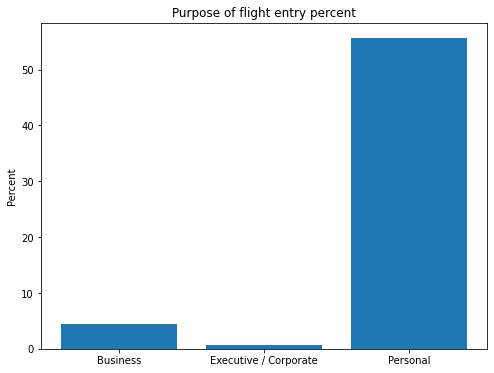

In [51]:
# Bargraph to compare purpose of flight entry percent

height = [4.52, 0.62, 55.63]
x = range(3)
labels = ['Business', 'Executive / Corporate', 'Personal']

fig, ax = plt.subplots(figsize = (8,6))
ax.bar(x, height, tick_label = labels)

ax.set_title('Purpose of flight entry percent')
ax.set_ylabel('Percent');

Visually, its even clearer that personal flights have significantly more entries into the data base. What about how many fatalities is each purpose of flight associated with? 

utilized function:

`p_flight_fatal_count`

In [52]:
p_flight_fatal_count('Business')

'Business flights are responsable for 2313.0 death(s)'

In [53]:
p_flight_fatal_count('Executive/corporate')

'Executive/corporate flights are responsable for 598.0 death(s)'

In [54]:
p_flight_fatal_count('Personal')

'Personal flights are responsable for 18762.0 death(s)'

In [55]:
len(df1[df1['Purpose.of.flight'] == 'Personal'])

49448

Lets put these numbers in a graph

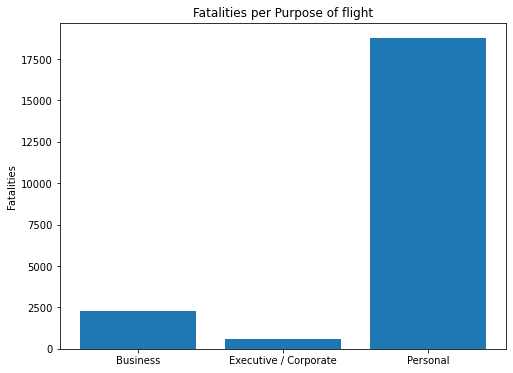

In [56]:
# Bargraph to compare purpose of flight fatalities 

height = [2313, 598, 18762]
x = range(3)
labels = ['Business', 'Executive / Corporate', 'Personal']

fig, ax = plt.subplots(figsize = (8,6))
ax.bar(x, height, tick_label = labels)

ax.set_title('Fatalities per Purpose of flight')
ax.set_ylabel('Fatalities');

Once again, we see Personal flights having the less desirable stats, having significantly higher fatalities then other purpose of flights.  

function utilized:

`get_p_percent`

In [57]:
get_p_percent('Business')

'Business flights are responsable for 5.97 % of fatalities'

In [58]:
get_p_percent('Executive/corporate')

'Executive/corporate flights are responsable for 0.79 % of fatalities'

In [59]:
get_p_percent('Personal')

'Personal flights are responsable for 58.28 % of fatalities'

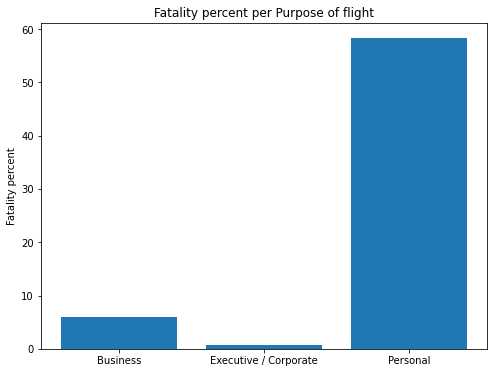

In [60]:
# Bargraph to compare purpose of flight fatalities 

height = [5.97, 0.79, 58.28]
x = range(3)
labels = ['Business', 'Executive / Corporate', 'Personal']

fig, ax = plt.subplots(figsize = (8,6))
ax.bar(x, height, tick_label = labels)

ax.set_title('Fatality percent per Purpose of flight')
ax.set_ylabel('Fatality percent');

## Adding to the Data Frame

Here we create some new columns to contain gathered information. The first column adds togeher the amount of non-fatal injuries with fatal injuries, and the second only adds non-fatal injuries together.  

In [61]:
df1['Total_Injuries'] = df1['Total.Fatal.Injuries'] + df1['Total.Serious.Injuries'] + df1['Total.Minor.Injuries']

In [62]:
df1['Total_Non_Fatal'] = df1['Total.Serious.Injuries'] + df1['Total.Minor.Injuries']

In [63]:
df1

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,year,Total_Injuries,Total_Non_Fatal
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,1948,2.0,0.0
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,1962,4.0,0.0
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,0.0,0.0,NaN,IMC,Cruise,Probable Cause,26-02-2007,1974,3.0,0.0
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,1977,2.0,0.0
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,2.0,0.0,0.0,VMC,Approach,Probable Cause,16-04-1980,1979,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022,2022,1.0,1.0
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,2022,0.0,0.0
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022,2022,0.0,0.0
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,2022,0.0,0.0


Here we see that the amount of incidents that resulted in any fatalities or injuries is 17,813

In [64]:
len(df1.loc[df1['Total.Fatal.Injuries'] >= 1])

17813

Gather make/models with 0 total injuries including deaths

In [65]:
list_with_no_injuries = df1.loc[df1['Total_Injuries'] < 1]['Model']

In [66]:
list_with_no_injuries.head()

7           140
8          401B
10    PA-28-161
11         V35B
16         280C
Name: Model, dtype: object

In [67]:
len(list_with_no_injuries)

48398

Subtract `list_with_no_injuries` from the total entires in original df to see difference

In [68]:
len(df1) - len(list_with_no_injuries)

40491

While `list_with_no_injuries` has over 40,000 less entries due to removing entries that have any injuries, this list is still to large to base a purchase off of.

In [69]:
df1['Aircraft.damage'].value_counts()

Aircraft.damage
Substantial    64148
Destroyed      18623
Minor           2805
Unknown          119
Name: count, dtype: int64

Here we use `merge` to combine together the 2 data sets that have been created.

In [70]:
minor_damage = df1[df1['Aircraft.damage'] == 'Minor']

In [71]:
no_injuries = df1[df1['Total_Injuries'] == 0.0]

In [72]:
df2 = minor_damage.merge(no_injuries, how = 'inner')

Check `df2` to see it merged properly

In [73]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2287 entries, 0 to 2286
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                2287 non-null   object        
 1   Investigation.Type      2287 non-null   object        
 2   Accident.Number         2287 non-null   object        
 3   Event.Date              2287 non-null   datetime64[ns]
 4   Location                2279 non-null   object        
 5   Country                 2277 non-null   object        
 6   Latitude                668 non-null    object        
 7   Longitude               668 non-null    object        
 8   Airport.Code            1439 non-null   object        
 9   Airport.Name            1485 non-null   object        
 10  Injury.Severity         2065 non-null   object        
 11  Aircraft.damage         2287 non-null   object        
 12  Aircraft.Category       937 non-null    object  

Adding a `year` column makes it a lot easier to gather information by the year.

## Engine Count

As mentioned above, we can fill in `null` values with 0 for certain columns. Replacing `null` with 0 in the `Number.of.Engines` column doesn't alter the overall data, and allows us to treat the `null` value as a number, even though to us 0 has no value.

In [74]:
# fill null values in with 0
df2['Number.of.Engines'].fillna(0.0, inplace = True)

In [75]:
df1['Number.of.Engines'].value_counts()

Number.of.Engines
1.0    69582
2.0    11079
0.0     1226
3.0      483
4.0      431
8.0        3
6.0        1
Name: count, dtype: int64

Here we utilize a `function` to compare the differences between 1 engine and 2 engine aircrafts. 

function utilized:

`engine_count`

In [76]:
engine_count(1)

'1 engine airplanes are 78.28 % of incidents'

In [77]:
engine_count(2)

'2 engine airplanes are 12.46 % of incidents'

In [78]:
# subtract the percentages to see the incident reduction by adding a single engine
78.28 - 12.46

65.82

By adding a single engine, ugrading from 1 to 2, we see nearly a 66% reduction in incidents. Having dual engines seems to be extremely valuable to ensuring safety.  

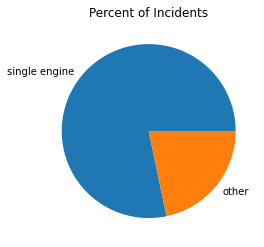

In [79]:
y = np.array([78.28,21.72])
labels = ['single engine', 'other']
plt.pie(y, labels = labels)
plt.title('Percent of Incidents')
plt.show()

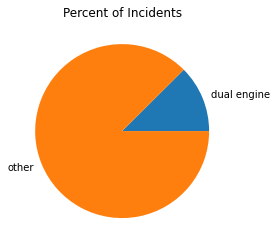

In [80]:
y = np.array([12.46,87.54])
labels = ['dual engine', 'other']
plt.pie(y, labels = labels)
plt.title('Percent of Incidents')
plt.show()

With these 2 pie charts we can visually see how adding 1 more engine results in a significant reduction in incidents.

Let's see what percent of fatalities each engine count is responsable for

function utilized:

`engine_fatal_percent`

In [81]:
engine_fatal_percent(1)

'1 engine aircraft are responsable for 25.42 % of fatalities'

In [82]:
engine_fatal_percent(2)

'2 engine aircraft are responsable for 5.49 % of fatalities'

In [83]:
# fatalities associtated with 1 engine aircraft
engine_list_1 = df1[df1['Number.of.Engines'] == 1]
fatality_count = engine_list_1[engine_list_1['Total.Fatal.Injuries'] >= 1]
len(fatality_count)

12761

In [84]:
# fatalities associtated with 2 engine aircraft
engine_list_2 = df1[df1['Number.of.Engines'] == 2]
fatality_count = engine_list_2[engine_list_2['Total.Fatal.Injuries'] >= 1]
len(fatality_count)

2756

Here we see that 2 engine aircrafts have significantly less fatalities, 10,005 to be exact. 

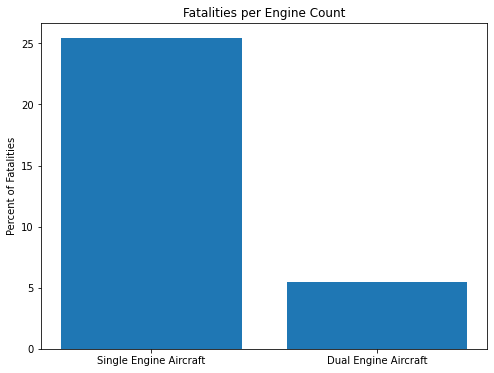

In [85]:
# Bargraph to compare engine count fatality percents 

height = [25.42, 5.49]
x = range(2)
labels = ['Single Engine Aircraft', 'Dual Engine Aircraft']

fig, ax = plt.subplots(figsize = (8,6))
ax.bar(x, height, tick_label = labels)

ax.set_title('Fatalities per Engine Count')
ax.set_ylabel('Percent of Fatalities');

## Narrowing Down

Airplanes are the primary focus, so we will remove entries that are anything else.

In [86]:
df2['Aircraft.Category'].value_counts()

Aircraft.Category
Airplane        879
Helicopter       55
Unknown           2
Powered-Lift      1
Name: count, dtype: int64

In [87]:
# create new dataframe that is only airplanes
df3 = df2[df2['Aircraft.Category'] == 'Airplane']

In [88]:
df3['Aircraft.Category'].value_counts()

Aircraft.Category
Airplane    879
Name: count, dtype: int64

In [89]:
df3['Amateur.Built'].value_counts()

Amateur.Built
No     847
Yes     26
Name: count, dtype: int64

`Amateur.Built` aircraft is not a field we will be considering at this time.

In [90]:
df4 = df3[df3['Amateur.Built'] == 'No']

Create new dataframe that only contains entries that have more than one engine, as having 2 engines results in a 66% reduction of incidents.

In [91]:
df5 = df4[df4['Number.of.Engines'] > 1]

In [92]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Reset the index so `info()` properly counts the amount of entries

In [93]:
df5 = df5.reset_index()

In [94]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   index                   395 non-null    int64         
 1   Event.Id                395 non-null    object        
 2   Investigation.Type      395 non-null    object        
 3   Accident.Number         395 non-null    object        
 4   Event.Date              395 non-null    datetime64[ns]
 5   Location                395 non-null    object        
 6   Country                 395 non-null    object        
 7   Latitude                214 non-null    object        
 8   Longitude               214 non-null    object        
 9   Airport.Code            305 non-null    object        
 10  Airport.Name            317 non-null    object        
 11  Injury.Severity         331 non-null    object        
 12  Aircraft.damage         395 non-null    object    

In [95]:
df5.drop('index', axis = 1, inplace = True)

## Dictionary

At this point, i looked into the top performing planes to gather the rest of my information. 

Here is a dictionary that holds each recommendation and information on each recommendation.

In [96]:
recs = {
'primary_rec' : {'primary_rec': 'Airbus a330', 
             'size' : 'medium', 
             'engine type' : '2 turbo fans', 
             'capacity' : '220 - 260', 
             'reasons' : 'the Airbus a330 is smaller then the B747, with only 2 engines, allwoing it to be quiter then the B747, as well as extremely safe.', 
             'still in production' : 'yes', 
             'Airbus percent of fatalities vs all entries' : airbus_percent_of_deaths,
             'Airbus flights fatality rate' : airbus_fatality_rate,
             'total percent of entries vs all entries' : airbus_total_rate,
             'number of exits' : '8'},

'secondary_rec' : {'secondary_rec': 'B747', 
                 'size': 'largest Boeing produces', 
                 'engine type': '4 turbo fans', 
                 'capacity' : '276 - 467', 
                 'reasons' : 'B747 has been choosen to be the secondary recommendation mainly due to the fact it has 4 engines instead of 2. while this allows for more redundancy, a common complaint among passengers is how loud the aircraft actually is. it boasts very good safety records.', 
                 'still in production': 'no',
                 'Boeing percent of fatlities vs all entries' : boeing_percent_of_deaths,
                 'Boeing flights fatality rate' : boeing_fatality_rate,
                 'total percent of entries vs all entries' : boeing_total_rate,
                 'number of exits' : '9'},

'third_rec' : {'third_rec' : 'Cessna Latitude', 
             'size' : 'small business jet', 
             'engine type' : '2 turbo fans', 
             'capacity' : 'max 9', 
             'reasons' : 'The Cessna Latitude is extremely safe and is also the most popular for personal / business ventures in the Cessna family.', 
             'still in production' : 'yes',
             'Cessna percent of fatalities vs all entries' : cessna_percent_of_deaths,
             'Cessna flights fatality rate' : cessna_fatality_rate,
             'total percent of entries vs all entries' : cessna_total_rate,
             'number of exits' : '1'}
}

In [97]:
recs['primary_rec']

{'primary_rec': 'Airbus a330',
 'size': 'medium',
 'engine type': '2 turbo fans',
 'capacity': '220 - 260',
 'reasons': 'the Airbus a330 is smaller then the B747, with only 2 engines, allwoing it to be quiter then the B747, as well as extremely safe.',
 'still in production': 'yes',
 'Airbus percent of fatalities vs all entries': '4.98 % of total deaths',
 'Airbus flights fatality rate': '0.15 % of incidents result in at least 1 death',
 'total percent of entries vs all entries': 'out of 88889 entries, Airbus is 0.51 % (455) of entries',
 'number of exits': '8'}

In [98]:
recs['secondary_rec']

{'secondary_rec': 'B747',
 'size': 'largest Boeing produces',
 'engine type': '4 turbo fans',
 'capacity': '276 - 467',
 'reasons': 'B747 has been choosen to be the secondary recommendation mainly due to the fact it has 4 engines instead of 2. while this allows for more redundancy, a common complaint among passengers is how loud the aircraft actually is. it boasts very good safety records.',
 'still in production': 'no',
 'Boeing percent of fatlities vs all entries': '17.43 % of total deaths',
 'Boeing flights fatality rate': '0.94 % of incidents result in at least 1 death',
 'total percent of entries vs all entries': 'out of 88889 entries, Boeing is 3.1 % (2753) of entries',
 'number of exits': '9'}

In [99]:
recs['third_rec']

{'third_rec': 'Cessna Latitude',
 'size': 'small business jet',
 'engine type': '2 turbo fans',
 'capacity': 'max 9',
 'reasons': 'The Cessna Latitude is extremely safe and is also the most popular for personal / business ventures in the Cessna family.',
 'still in production': 'yes',
 'Cessna percent of fatalities vs all entries': '19.23 % of total deaths',
 'Cessna flights fatality rate': '26.06 % of incidents result in at least 1 death',
 'total percent of entries vs all entries': 'out of 88889 entries, Cessna is 30.55 % (27158) of entries',
 'number of exits': '1'}

In [100]:
df1.to_csv('df1.csv')

# Metrics Results 

## Engine Type

For engine type, we compaired turbo fan, turbo shaft and turbo jet. Using graphs we cn see that turbo shaft is significantly worse when it comes to entries in this dataset. Turbo fan and turbo jet both seem to be fair choices when it comes to engine type.

## Purpose of Flight

Executive / corporate and business are leagues ahead of personal flights when it comes to safety. Commercial aircraft appear to be the safest due to the fact they utilize bigger aircraft, professional crews as well as better instraments within the cabin allowing for easier flight when in aggressive weather. 

## Engine Count

Increasing the aircrafts engine count from 1 to 2 results in a 66 % reduction in reported incidents. Adding an engine does have some trade offs though, primarily fuel consumption as well as weight added to the aircraft, however these cons seem well worth it for thatv major boos in safety and redundancey. 

# CONCLUSION

## Primary Recommendation:

I recommend the Airbus 330 as the primary candidate. This is due to the fact the aircraft boasts an extremely low incident rate being only 0.51% of entries within the NTSB data sheet, and out of those incidents, only 0.15% of incidents result in a fatality. The aircraft has a dual turbo engine allowing for redundancy and can hold a maximum of 260 passengers, placing this aircraft in the medium size category.  

## Secondary Recommendation:

The Boeing 747 takes second place, with a moderate 3.1% incident rate within the NTSB data sheet. This aircraft does have quad turbo fans, allowing for extremely good redundancy, with the trade off of consuming more fuel. This aircraft is placed in the large category, holding a maximum of 467 passengers.

## Tertiary Recommendation:

The Cessna Latitude is a great aircraft for personal / private jet use. It has dual turbo fan engines and a maximum capacity of 9. While some other brands had better stats shown above in the graphs comparing brands, the Cessna latitude has the rare accolade of having zero reported fatalities.